In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Loading Data

In [ ]:
data = pd.read_csv("btptablr.csv")

In [ ]:
data.head()

,load,stress,discharge,charge,capacity
0,3,5.175,3.433,4.173,2.475
1,3,5.233,3.437,4.172,2.478
2,3,5.283,3.430,4.176,2.480
3,3,5.312,3.435,4.177,2.477
4,3,5.358,3.434,4.175,2.468


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   load        413 non-null    int64  
 1   stress      413 non-null    float64
 2   discharge   413 non-null    float64
 3   charge      413 non-null    float64
 4   capacity    413 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 16.3 KB


In [ ]:
data.describe()

,load,stress,discharge,charge,capacity
count,413.000000,413.000000,413.000000,413.000000,413.000000
mean,6.196126,8.466172,3.428385,4.180809,2.496254
std,2.397973,1.970751,0.005383,0.002620,0.036891
min,3.000000,5.175000,3.415000,4.169000,2.403000
25%,3.000000,5.892000,3.424000,4.179000,2.472000
50%,6.000000,8.476000,3.427000,4.181000,2.501000
75%,9.000000,10.612000,3.433000,4.182000,2.523000
max,9.000000,10.855000,3.442000,4.199000,2.580000


In [ ]:
data.isnull().sum()

load          0
stress        0
discharge     0
charge        0
capacity      0
dtype: int64

In [ ]:
data.load.unique()

array([3, 6, 9])

Data labels we are having are not unique or discrete so we will use regression model to train and test our data.

Data Correlation

In [ ]:
data.corr(method="pearson")

,load,stress,discharge,charge,capacity
load,1.000000,0.997131,0.112027,-0.410108,0.105698
stress,0.997131,1.000000,0.103106,-0.399021,0.101859
discharge,0.112027,0.103106,1.000000,-0.515872,-0.550140
charge,-0.410108,-0.399021,-0.515872,1.000000,0.194703
capacity,0.105698,0.101859,-0.550140,0.194703,1.000000


In [ ]:
data.corr(method="kendall")

,load,stress,discharge,charge,capacity
load,1.000000,0.817229,0.079266,-0.364900,0.081922
stress,0.817229,1.000000,0.045845,-0.267798,0.110308
discharge,0.079266,0.045845,1.000000,-0.482438,-0.403347
charge,-0.364900,-0.267798,-0.482438,1.000000,0.172178
capacity,0.081922,0.110308,-0.403347,0.172178,1.000000


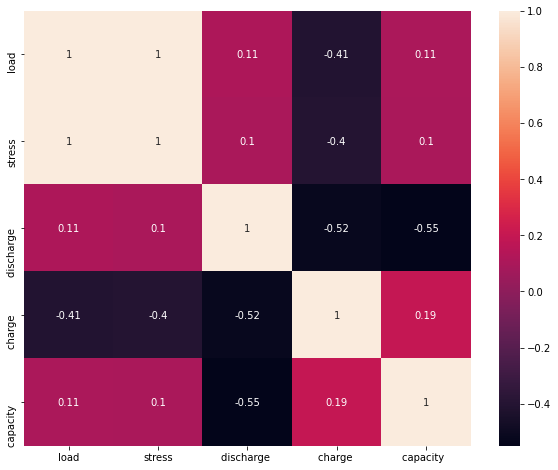

In [ ]:
f, ax=plt.subplots(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, ax=ax, annot = True)

Charge Analysis

In [ ]:
ax = sns.distplot(data["charge"])

KeyError: ignored

Stress Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


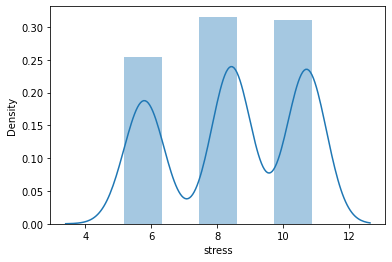

In [ ]:
ax = sns.distplot(data["stress"])

Splitting Data

In [ ]:
x = data.drop(data.columns[[4, 2]], axis=1)
y=data["capacity"]

KeyError: ignored